## Homework for week01

### Setup environment

- name env `zoomcamp`

```python
micromamba create -n zoomcamp python=3.9
micromamba activate zoomcamp
micromamba install numpy pandas scikit-learn seaborn jupyter
```

### Get data

```bash
!wget -P <path> -O <out_file_name>
```

In [1]:
# !wget -P ../data https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

#### Data Dictionary
[source](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

Take note that the numbers in dataset is referring to residential buildings `within a block` and is not for single-family homes.


> 1. longitude: A measure of how far west a house is; a higher value is farther west
> 
> 2. latitude: A measure of how far north a house is; a higher value is farther north
> 
> 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
> 
> 4. totalRooms: Total number of rooms within a block
> 
> 5. totalBedrooms: Total number of bedrooms within a block
> 
> 6. population: Total number of people residing within a block
> 
> 7. households: Total number of households, a group of people residing within a home unit, for a block
> 
> 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
> 
> 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
> 
> 10. oceanProximity: Location of the house w.r.t ocean/sea

#### What is a block?

[source](https://www.tripadvisor.co.uk/ShowTopic-g60763-i5-k550785-What_is_a_block-New_York_City_New_York.html)

> While a block properly so-called is just as described above, most New Yorkers (and indeed, most Americans) commonly use it to mean "the distance along a street between intersections."
> 
> If I start at the corner of Fifth Avenue and 50th Street and walk north along Fifth Avenue, when I come to 51st Street I have walked "one block", when I arrive at 53rd Street I have walked "three blocks", and so on.
> 
> Naturally, blocks are NOT the same length -- it is three or four times longer to walk the one block from Fifth to Sixth Avenues than it is to walk the one block from 35th to 36th Streets.

In [2]:
!which python

/cygdrive/b/mambaforge/envs/zoomcamp/python


## Import packages

In [3]:
import numpy as np
import pandas as pd


### Question 1

q: What's the version of Pandas that you installed?

a: 2.1.0

In [4]:
print(f'{pd.__version__ = }')

pd.__version__ = '2.1.0'


### Question 2

q: How many columns are in the dataset?

a: 10

In [5]:
df = pd.read_csv('../data/housing.csv')
print(f'{df.shape =}')

df.shape =(20640, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:

numerical_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

<Axes: >

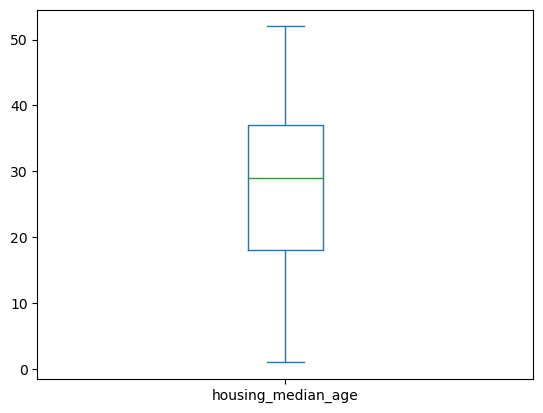

In [8]:
df['housing_median_age'].plot.box()

<Axes: >

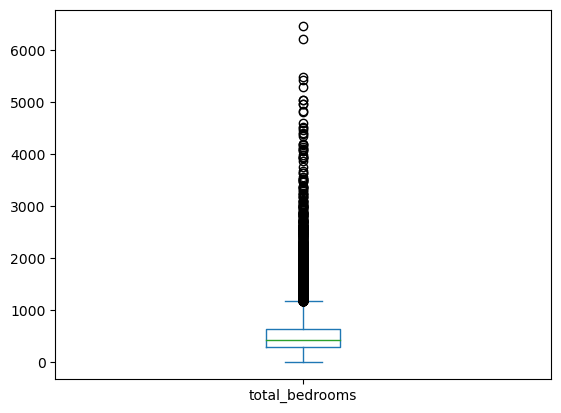

In [9]:
df['total_bedrooms'].plot.box()


### Question 3

q: Which columns in the dataset have missing values?

a: 'total_bedrooms'

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df.columns[df.isnull().sum() > 0]

Index(['total_bedrooms'], dtype='object')

### Question 4

q: How many unique values does the `ocean_proximity` column have?

a: 5

In [12]:
df['ocean_proximity'].nunique()

5

In [13]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Question 5

q: What's the average value of the `median_house_value` for the houses located near the bay?

a: 

In [14]:
df[df['ocean_proximity'] == 'NEAR BAY']['median_house_value'].mean()

259212.31179039303

### Question 6

q: 

1. Calculate the average of `total_bedrooms` column in the dataset.
1. Use the `fillna` method to fill the missing values in `total_bedrooms` with the mean value from the previous step.
1. Now, calculate the average of `total_bedrooms` again.
1. Has it changed?


a: No

1. 537.871
2. 
3. 537.871
4. 

In [15]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [16]:
df.columns[df.isnull().sum() > 0]

Index(['total_bedrooms'], dtype='object')

In [17]:
mean_before_fill = df['total_bedrooms'].mean()
median_before_fill = df['total_bedrooms'].median()

In [18]:
df_mean = df.copy()
df_median = df.copy()

In [19]:
df_mean['total_bedrooms'] = df['total_bedrooms'].fillna(mean_before_fill)
df_median['total_bedrooms'] = df['total_bedrooms'].fillna(median_before_fill)

In [20]:
df_mean.columns[df_mean.isnull().sum() > 0]

Index([], dtype='object')

In [21]:
mean_after_fill = df_mean['total_bedrooms'].mean()
median_after_fill = df_median['total_bedrooms'].median()
print(f'mean before fillna: {mean_before_fill:.3f}')
print(f'mean after fillna: {mean_after_fill:.3f}')
print()
print(f'median before fillna: {median_before_fill:.3f}')
print(f'median after fillna: {median_after_fill:.3f}')

mean before fillna: 537.871
mean after fillna: 537.871

median before fillna: 435.000
median after fillna: 435.000


q: Is it different when `median` is used instead of `mean`?
a: No

### Question 7

q:

1. Select all the options located on islands.
1. Select only columns housing_median_age, total_rooms, total_bedrooms.
1. Get the underlying NumPy array. Let's call it X.
1. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
1. Compute the inverse of XTX.
1. Create an array y with values [950, 1300, 800, 1000, 1300].
1. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
1. What's the value of the last element of w?


a: code snippets below

1. Select all the options located on islands.

In [22]:
islands = df[df['ocean_proximity'] == 'ISLAND']

2. Select only columns housing_median_age, total_rooms, total_bedrooms.

In [23]:
subset = islands[['housing_median_age', 'total_rooms', 'total_bedrooms']]

3. Get the underlying NumPy array. Let's call it X.

In [24]:
X = subset.to_numpy()

In [25]:
print(f'{X.shape = }')
print(f'{X.T.shape = }')

X.shape = (5, 3)
X.T.shape = (3, 5)


4. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.

In [26]:
XTX = X.T @ X
XTX

array([[9.6820000e+03, 3.5105300e+05, 9.1357000e+04],
       [3.5105300e+05, 1.4399307e+07, 3.7720360e+06],
       [9.1357000e+04, 3.7720360e+06, 9.9835800e+05]])

5. Compute the inverse of XTX.

In [27]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 9.19403586e-04, -3.66412216e-05,  5.43072261e-05],
       [-3.66412216e-05,  8.23303633e-06, -2.77534485e-05],
       [ 5.43072261e-05, -2.77534485e-05,  1.00891325e-04]])

6. Create an array y with values [950, 1300, 800, 1000, 1300].

In [28]:
y = np.array([950, 1300, 800, 1000, 1300])
y

array([ 950, 1300,  800, 1000, 1300])

7. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.

In [29]:
w = np.matmul(np.matmul(np.linalg.inv(XTX), X.T), y)

In [30]:
XTX_inv @ X.T @ y

array([23.12330961, -1.48124183,  5.69922946])

8. What's the value of the last element of w?

In [31]:
w[-1]

5.6992294550655656